In [1]:
import os
import cv2
import shutil
import random
import numpy as np
from glob import glob
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt


In [7]:
# Path to the folder containing images
folder_path = "D:\\Roboflow\\dataset\\images"

# Directory to store train and test directories
data_dir = "D:\\Roboflow\\dataset"

# Create data directory if it doesn't exist
os.makedirs(data_dir, exist_ok=True)

# Path to the train and test directories
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


# Percentage split for train-test
split_percentage = 0.8



In [8]:
# List to store the loaded images
image_files = []

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_files.append(filename)

# Calculate the number of images for the train set
num_train = int(len(image_files) * split_percentage)

# Randomly shuffle the list of image files
random.shuffle(image_files)

# Copy images to train directory
for filename in image_files[:num_train]:
    src = os.path.join(folder_path, filename)
    dst = os.path.join(train_dir, filename)
    shutil.copyfile(src, dst)

# Copy images to test directory
for filename in image_files[num_train:]:
    src = os.path.join(folder_path, filename)
    dst = os.path.join(test_dir, filename)
    shutil.copyfile(src, dst)

print("Images split into train and test directories.")

Images split into train and test directories.


In [9]:
# masked_img_folder = r'D:\Roboflow\dataset\masked_img'
masked_img_folder = 'D:\\Roboflow\\dataset\\masked_img'


In [12]:
# Function to read images from a folder
def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return images

# Read images from train folder
train_images = read_images_from_folder(train_dir)

# Read images from test folder
test_images = read_images_from_folder(test_dir)

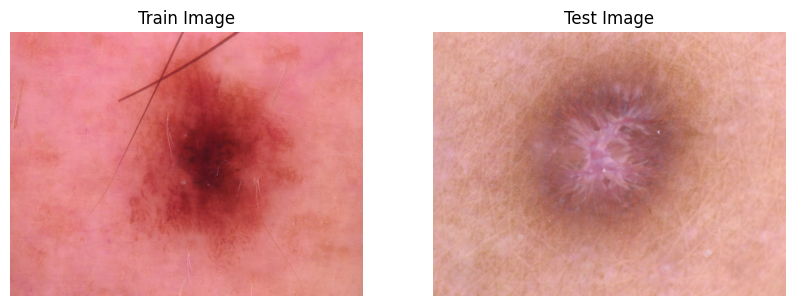

In [13]:
# Display one image from each folder
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(train_images[0])
plt.title('Train Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(test_images[0])
plt.title('Test Image')
plt.axis('off')

plt.show()

In [14]:
# Function to check if masked_img folder is empty
def is_masked_img_folder_empty(folder_path):
    return len(glob(os.path.join(folder_path, '*'))) == 0

In [15]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


In [8]:
#This step can be skipped if u have done it before following rdme file.
%pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [9]:
import torch
from pathlib import Path
from PIL import Image

In [10]:
# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

d:\Roboflow\myenv\Lib\site-packages\torch\hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\SUVROJIT/.cache\torch\hub\master.zip
YOLOv5  2024-2-21 Python-3.11.8 torch-2.2.0+cpu CPU

100%|██████████| 14.1M/14.1M [00:01<00:00, 11.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [14]:
# Check if masked_img folder is empty
if is_masked_img_folder_empty(masked_img_folder):
    # Mask images from train folder using YOLOv5
    # Assuming you have code to mask images with YOLOv5, you should add it here
    # Here, we'll just use a placeholder function that creates a blank image for demonstration
    def mask_images_with_yolov5(images):
        masked_images = []
        for img in images:
            masked_img = np.zeros_like(img)
            masked_images.append(masked_img)
        return masked_images
    
    # Read images from train folder
    train_images = read_images_from_folder(train_dir)
    
    # Mask images using YOLOv5
    masked_train_images = mask_images_with_yolov5(train_images)
    
    # Read images from test folder
    test_images = read_images_from_folder(test_dir)
    
    # Mask images using YOLOv5
    masked_test_images = mask_images_with_yolov5(test_images)

In [15]:
 # Save masked images to masked_img folder
for idx, masked_img in enumerate(masked_train_images):
        Image.fromarray(masked_img).save(os.path.join(masked_img_folder, f'train_{idx}.jpg'))

for idx, masked_img in enumerate(masked_test_images):
        Image.fromarray(masked_img).save(os.path.join(masked_img_folder, f'test_{idx}.jpg'))

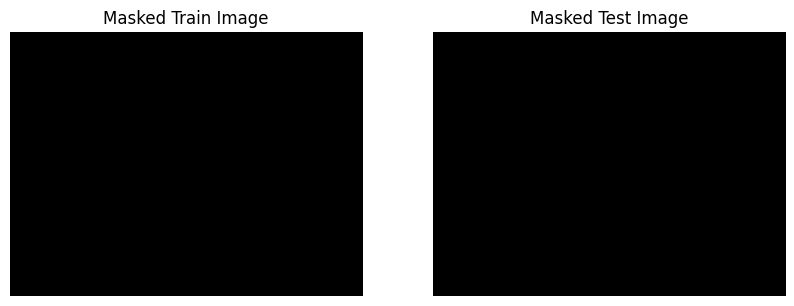

In [16]:
# Display one masked image from each folder
masked_train_images = read_images_from_folder(masked_img_folder)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(masked_train_images[0])
plt.title('Masked Train Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(masked_test_images[0])
plt.title('Masked Test Image')
plt.axis('off')

plt.show()